## 2-a

For an upcoming presentation, you are asked to predict total gate revenue for the entire NBA Playoffs. You should use the win probabilities data and the Hypothetical Playoff Gate Data to answer part b of the question.
a) As a primer, let’s think about an individual series. Team East1 plays Team East8 in the First Round. Suppose the probability that East1 defeats East8 at home (8 @ 1) is p_H, and the probability that East1 defeats East8 on the road (1 @ 8) is p_A. In terms of p_H and p_A, what is the probability that the series goes exactly N games for N in {4,5,6,7}, regardless of winner? Please give closed-form analytical solutions.

In [6]:
from random import randint
def simulation():

    n = int(raw_input("input the number of simulations: "))
    x = 0
    
    for i in range(n):
    
        Season_game = 41
        possibility = 75
        continued = 0
        penalty = 0

        while Season_game > 0:

            if randint(0,100) > 75:
                continued = continued + 1
            else:
                continued = 0

            if continued == 3:
                penalty = 1
                x = x + 1
                break

            Season_game = Season_game - 1
    
    return 1 - (x/float(n))

In [7]:
simulation()

input the number of simulations: 1000


0.628

## 2-b

Now suppose that the regular season has just concluded and the NBA playoff picture is set. Team Finance has forecasted gate revenue per game for every team in each possible round – these per-game forecasts for each (team, round) combination are given in the Hypothetical Playoff Gate Data tab in the attached Excel file. Further suppose you are given win_probabilities.csv, which describes the probability that a given team defeats any other team, either at home or on the road. (The format of the probabilities in each row may not be standard.) Note that there is no re-seeding in the NBA Playoffs and that each series follows a 2-2-1-1-1 format. If equal seeds make the Finals, suppose the West team has home court advantage; otherwise, suppose the better seed has home court. Build a playoff simulator that tracks gate revenue using this data. (Assume each game is independent.) Please include any code or any additional materials you used to build your simulator in a zip folder.

In [8]:
import pandas as pd
import numpy
from pandas import *
from collections import Counter
import xlrd

In [9]:
probabilities = pd.ExcelFile("win_probabilities.xlsx", sheetname=None)
dfs = probabilities.parse('win_probabilities.csv')

In [10]:
a = numpy.zeros(shape=(16,16))
df = pd.DataFrame(a)
one_wins_home = dfs['Prob1WinsHome'].tolist()
one_wins_away = dfs['Prob1WinsAway'].tolist()

In [11]:
q = len(one_wins_home)
m =0
n =1

for l in range(q):
    df.iat[m, n+m] = one_wins_home[l]
    if (15-n-m)!=0:
        n = n+1
    else:
        m = m+1
        n = 1

In [12]:
q = len(one_wins_away)
m =0
n =1

for l in range(q):
    df.iat[n+m, m] = one_wins_away[l]
    if (15-n-m)!=0:
        n = n+1
    else:
        m = m+1
        n = 1

In [13]:
revenues = pd.ExcelFile("Business-Track-Application-Datasets.xlsx", sheetname='Hypothetical Playoff Gate Data')
rev_df = revenues.parse('Hypothetical Playoff Gate Data')
revenue_df = rev_df.drop('Unnamed: 0', 1)
rev = revenue_df.rename(columns={'HomeTeam':'0','Round1_Gate':1,'Round2_Gate':'2', 'Round3_Gate':'3', 'Round4_Gate': '4'})
revenue = rev.drop('0',1)

In [14]:
game = {'H1': 0, 'H2': 0, 'A1': 0, 'A2': 0, 'H3': 0, 'A3': 0, 'H4': 0}
team1 = []
team2 = []

In [15]:
team1 = list(range(1,9))
team2 = list(range(1,9))

In [16]:
## Forming pairs for each round
## Comp1 and Comp2 will always have Comp1 as home team for 1st match and Comp2 as away 
def east(round_now = 1, next_team = list(range(1,9))):
    c1 = []
    c2 = []    
    new_team1 = []
    rev_east = 0
    team1 = next_team
    
    for i in range(len(team1)):
        comp1 = team1[i]
        c1.append(comp1)
        comp2 = team1[len(team1)-i-1]
        c2.append(comp2)
        if comp2<comp1:
            temp = comp2
            comp2= comp1
            comp1= temp
        (most_wins,rev_match) = rev_team_east(round_now,comp1,comp2)
        new_team1.append(most_wins)
        
        rev_east = rev_east + rev_match
        if (team1[i]==team1[len(team1)-i-2]):
            break

    return (new_team1, rev_east)

In [17]:
##Forming pairs for each round
## Comp1 and Comp2 will always have Comp1 as home team for 1st match and Comp2 as away 
def west(round_now = 1, next_team = list(range(1,9))):
    c1 = []
    c2 = []
    new_team2 = []
    rev_west = 0
    team2 = next_team
    for i in range(len(team2)):
        comp1 = team2[i]
        c1.append(comp1)
        comp2 = team2[len(team2)-i-1]
        c2.append(comp2)
        if comp2<comp1:
            temp = comp2
            comp2= comp1
            comp1= temp
        (most_wins,rev_match) = rev_team_west(round_now,comp1,comp2)
        new_team2.append(most_wins)
        rev_west = rev_west + rev_match

        if (team2[i]==team2[len(team2)-i-2]):
            break

    return (new_team2, rev_west)

In [18]:
def rev_team_east(round_now,comp1,comp2):
    home = 0
    away = 0
    wins = []
    new_comp_list = []

    u = 1
    while u <= 7:
        q = np.arange(0.0, 1.0, 0.01)
        rand_prob = np.random.choice(q)
        if u in (1,2,5,7):
            t = df.at[(comp1-1),(comp2-1)]
            if t>rand_prob:
                winner = comp1
            else:
                winner = comp2
            wins.append(winner)
            home = home + 1
        else:
            t = df.at[(comp2-1),(comp1-1)]
            if t>rand_prob:
                winner = comp1
            else:
                winner = comp2
            wins.append(winner)
            away = away + 1
        most_wins,num_most_wins = Counter(wins).most_common(1)[0] # whos winning, winning count so far times
        if num_most_wins==4:
            break
        u = u + 1


        
    #return most_wins   # append this to create new list
    rev_match = (home * revenue.iat[(comp1-1),(round_now-1)]) + (away * revenue.iat[(comp2-1),(round_now-1)])  ## round that is going on
    return (most_wins, rev_match)  # add this to calc revenue for a round

In [19]:
def rev_team_west(round_now,comp1,comp2):
    home = 0
    away = 0
    wins = []
    new_comp_list = []
    u = 1
    while u <= 7:
        q = np.arange(0.0, 1.0, 0.01)
        rand_prob = np.random.choice(q)
        if u in (1,2,5,7):
            t = df.at[(comp1-1+8),(comp2-1+8)]
            if t>rand_prob:
                winner = comp1
            else:
                winner = comp2
            wins.append(winner)
            home = home + 1
        else:
            t = df.at[(comp2-1+8),(comp1-1+8)]
            if t>rand_prob:
                winner = comp1
            else:
                winner = comp2
            wins.append(winner)
            away = away + 1
        most_wins,num_most_wins = Counter(wins).most_common(1)[0] # whos winning, winning count so far times
        if num_most_wins==4:
            break
        u = u + 1
        #return most_wins   # append this to create new list
    rev_match = (home * revenue.iat[(comp1-1+8),(round_now-1)]) + (away * revenue.iat[(comp2-1+8),(round_now-1)])  ## round that is going on
    return (most_wins, rev_match)  # add this to calc revenue for a round

In [20]:
def rev_team_WH(round_now,comp1,comp2):
    home = 0
    away = 0
    wins = []
    new_comp_list = []
    u = 1
    while u <= 7:
        q = np.arange(0.0, 1.0, 0.01)
        rand_prob = np.random.choice(q)
        if u in (1,2,5,7):
            t = df.at[(comp1-1+8),(comp2-1)]
            if t>rand_prob:
                winner = comp1
            else:
                winner = comp2
            wins.append(winner)
            home = home + 1
        else:
            t = df.at[(comp2-1),(comp1-1+8)]
            if t>rand_prob:
                winner = comp1
            else:
                winner = comp2
            wins.append(winner)
            away = away + 1
        most_wins,num_most_wins = Counter(wins).most_common(1)[0] # whos winning, winning count so far times
        if num_most_wins==4:
            break
        u = u + 1
        #return most_wins   # append this to create new list
    rev_match = (home * revenue.iat[(comp1-1+8),(round_now-1)]) + (away * revenue.iat[(comp2-1),(round_now-1)])  ## round that is going on
    return (most_wins, rev_match)  # add this to calc revenue for a round

In [21]:
def rev_team_WA(round_now,comp1,comp2):
    home = 0
    away = 0
    wins = []
    new_comp_list = []
    u = 1
    while u <= 7:
        q = np.arange(0.0, 1.0, 0.01)
        rand_prob = np.random.choice(q)
        if u in (1,2,5,7):
            t = df.at[(comp2-1),(comp1-1+8)]
            if t>rand_prob:
                winner = comp1
            else:
                winner = comp2
            wins.append(winner)
            home = home + 1
        else:
            t = df.at[(comp1-1+8),(comp2-1)]
            if t>rand_prob:
                winner = comp1
            else:
                winner = comp2
            wins.append(winner)
            away = away + 1
        most_wins,num_most_wins = Counter(wins).most_common(1)[0] # whos winning, winning count so far times
        if num_most_wins==4:
            break
        u = u + 1

    #return most_wins   # append this to create new list
    rev_match = (home * revenue.iat[(comp1-1+8),(round_now-1)]) + (away * revenue.iat[(comp2-1),(round_now-1)])  ## round that is going on
    return (most_wins, rev_match)  # add this to calc revenue for a round

In [22]:
total_stack = []
e1_stack = []
e2_stack = []
e3_stack = []
w1_stack = []
w2_stack = []
w3_stack = []
final_stack = []
east_4_5 = []

east_final = []
west_final = []

for i in range(10000):
    
    
    
    (new_team_one, rev_e1) = east()
    (new_team_two, rev_w1) = west()
    
    # def round_run(new_team_one, new_team_two):    
    #     for j in range(2,4):
    c1 = new_team_one
    c2 = new_team_two
    
    east_4_5.append(c2[3])
    
    (d1,rev_e2) = east(2, c1)
    (d2,rev_w2) = west(2, c2)
    (e1, rev_e3) = east(3, d1)
    (e2, rev_w3) = west(3, d2)

    comp1 = e2[0]         ## West has preference over east if they are equal seeded
    comp2 = e1[0]
    
    east_final.append(comp1)
    west_final.append(comp2)
    
    if comp2<comp1:
        temp = comp2
        comp2= comp1
        comp1= temp
    if comp1 == e2[0]:
        (most_wins,rev_final) = rev_team_WH(4,comp1,comp2)
    else:
        (most_wins,rev_final) = rev_team_WA(4,comp1,comp2)
    total_revenue = rev_final+ rev_e1+ rev_e2+ rev_e3+ rev_w1+ rev_w2+ rev_w3
    total_stack.append(total_revenue)
    e1_stack.append(rev_e1)
    e2_stack.append(rev_e2)
    e3_stack.append(rev_e3)
    w1_stack.append(rev_w1)
    w2_stack.append(rev_w2)
    w3_stack.append(rev_w3)
    final_stack.append(rev_final)

In [23]:
np.mean(total_stack)

231686190.76541284

We built up a simulation model to estimate the revenue through an entire play-off. From 10,000 iteration, the estimated revenue from the play-off is about $231,765,415.

## 2-c

How do you propose to present a solution to the team? You want to ensure the team understands that there is a relatively wide distribution of possible outcomes. What is the solution?

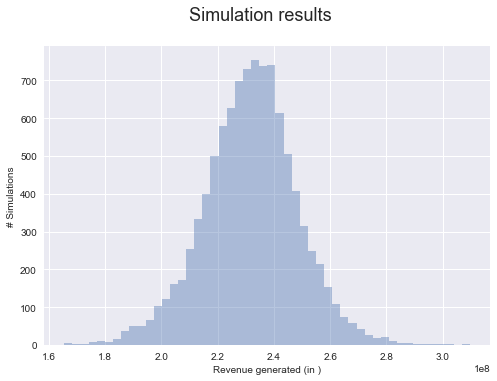

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig = sns.distplot(total_stack, kde = False)

fig.figure.suptitle("Simulation results", fontsize = 18)

plt.xlabel('Revenue generated (in )', fontsize=10)
plt.ylabel('# Simulations', fontsize=10)

We have generated a histogram, since it is the best way to show a shape and rage of distribution.

Moreover, we've investigated the root cause of this wide range of distribution by using boxplots. At the round 2 and 3 in East, and at the round 3 in West have a wider range of distribution compared to other series.

In [25]:
e1_stack = pd.DataFrame(e1_stack)
e1_stack["Match"] = "e1"

e2_stack = pd.DataFrame(e2_stack)
e2_stack["Match"] = "e2"

e3_stack = pd.DataFrame(e3_stack)
e3_stack["Match"] = "e3"

w1_stack = pd.DataFrame(w1_stack)
w1_stack["Match"] = "w1"

w2_stack = pd.DataFrame(w2_stack)
w2_stack["Match"] = "w2"

w3_stack = pd.DataFrame(w3_stack)
w3_stack["Match"] = "w3"

final_stack = pd.DataFrame(final_stack)
final_stack["Match"] = "final"

total = e1_stack.append(e2_stack)
total = total.append(e3_stack)
total = total.append(w1_stack)
total = total.append(w2_stack)
total = total.append(w3_stack)
total = total.append(final_stack)

total = total.rename(columns={0: 'revenue'})

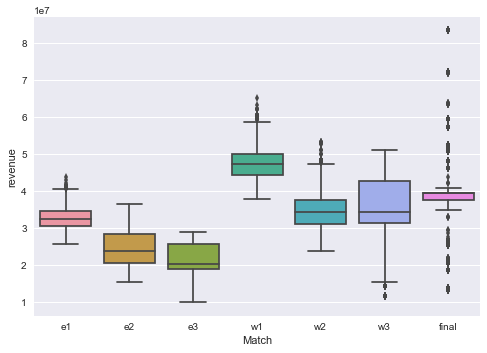

In [26]:
ax = sns.boxplot(x="Match", y="revenue", data=total)

## 2-d

### What is the probability that West1 meets East1 in the Finals? 

In [27]:
n = 0
rev_d4 = []



for i in range(len(final_stack)):
    if east_final[i] == 1 & west_final[i] == 1:
        n = n+1
        rev_d4.append(total_stack[i])
        

In [28]:
n / float(len(final_stack))

0.4404

#### The probability that West1 meets East1 in the Finals is about 45%

### What is the expected total Playoffs gate revenue if West1 meets East1 in the Finals?

In [29]:
np.mean(rev_d4)

233448393.91919911

#### The expected revenue from the entire Playoffs is about $23,359,623

### What if West1 does not meet East1 in the Finals?

In [30]:
n = 0
rev_d4 = []

for i in range(len(final_stack)):
    if east_final[i] != 1 & west_final[i] == 1:
        n = n+1
        rev_d4.append(total_stack[i])

In [31]:
n / float(len(final_stack))

0.228

In [32]:
np.mean(rev_d4)

231803331.35628787

#### The probability is about 22%, and the expected revenue is about $232,202,120

### How does your solution change if – independent of all other series – East5 defeats East4 in the First Round?

In [33]:
n = 0
rev_e5 = []

for i in range(len(final_stack)):
    if east_4_5[i] == 5:
        rev_e5.append(total_stack[i])

In [34]:
np.mean(rev_e5)

232973843.61647251

#### The expected revenue is decreasing to about $233,870,721, which is similar to the original value. Even though East5 generates higher revenue than East4, at the next round the possiblity that East2 or East3 wins againast East5 is much higher than that against East4, which generates much lower revenue, the expected revenue is simliar to the initial value.